In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


### Load dataset

In [2]:
dataset=pd.read_csv('Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
dataset.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
# no target variable, to know annual income weonly considering two variables

In [5]:
### Extracting indenepndent
x=dataset.iloc[:,[3,4]].values

## Visualize
- Scatter

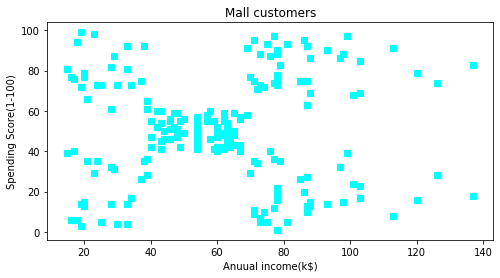

In [6]:
plt.figure(figsize=(8,4))
plt.scatter(x[:,0],x[:,1],color='cyan',marker='s')
plt.xlabel('Anuual income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.title('Mall customers')
plt.show()

## BUilding a Machine learing model
- K means

In [7]:
from sklearn.cluster import KMeans

In [8]:
## Assume k = 2 clusters intially
# inertia is wcss value= with in cluster sum of squares
model=KMeans(n_clusters=2)
model.fit(x)
wcss= model.inertia_
print(wcss)
print(model.cluster_centers_)
center= model.cluster_centers_

181363.59595959596
[[79.6        50.12727273]
 [37.28888889 50.28888889]]


In [9]:
y_pred=model.predict(x)  #in predictions based on voronai diagram its makes differentiate
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

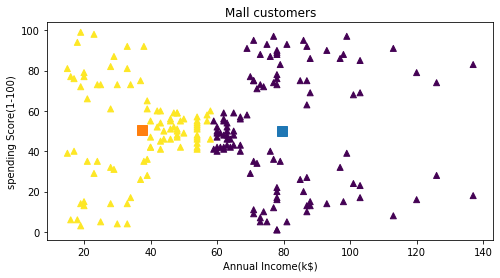

In [10]:
plt.figure(figsize=(8,4))
plt.scatter(x[:,0],x[:,1],c=y_pred,marker='^')
plt.plot(center[0][0],center[0][1],marker='s',markersize=10)
plt.plot(center[1][0],center[1][1],marker='s',markersize=10)
plt.xlabel('Annual Income(k$)')
plt.ylabel('spending Score(1-100)')
plt.title('Mall customers')
plt.show()

In [11]:
len(dataset)

200

In [12]:
wcss=[]
for i in range(1,201):   #we need to take total clusters =len(dataset) ,each data become one cluster.final distance=0
    n=i
    model_kmeans=KMeans(n_clusters=n)
    model_kmeans.fit(x)
    wcss.append(model_kmeans.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (196) found smaller than n_clusters (197). Possibly due to duplicate points in X.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (196) found smaller than n_clusters (198). Possibly due to duplicate points in X.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (196) found smaller than n_clusters (199). Possibly due to duplicate points in X.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (196) found smaller than n_clusters (200). Possibly due to duplicate points in X.
  """


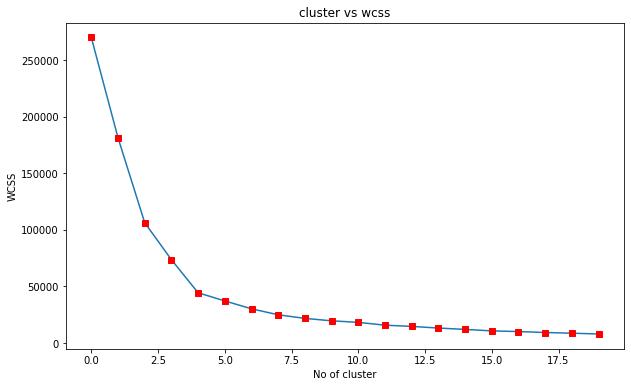

(Text(0.5, 1, 'cluster vs wcss'), None)

In [13]:
plt.figure(figsize=(10,6))
plt.plot(wcss[:20])
plt.plot(wcss[:20],'rs')
plt.xlabel('No of cluster')
plt.ylabel('WCSS')
plt.title('cluster vs wcss'),plt.show()

In [14]:
# From elbow method optimal no of clusters =5


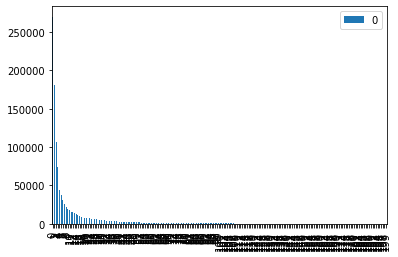

In [15]:
wc_se=pd.DataFrame(wcss)
wc_se.plot.bar()
plt.show()

In [16]:
n=5
model_kmeans=KMeans(n_clusters=n)
model_kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [17]:
y=model_kmeans.predict(x)
cen=model_kmeans.cluster_centers_

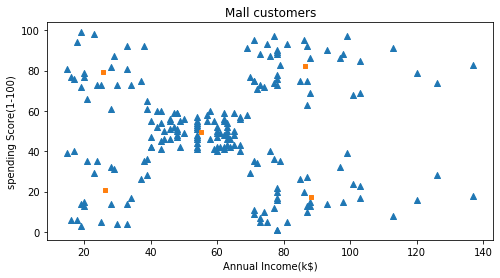

In [18]:
plt.figure(figsize=(8,4))
plt.scatter(x[:,0],x[:,1],marker='^',cmap='gnuplot')
plt.scatter(cen[:,0],cen[:,1],marker='s',s=10)
plt.xlabel('Annual Income(k$)')
plt.ylabel('spending Score(1-100)')
plt.title('Mall customers')
plt.show()

In [19]:
from scipy.spatial import Voronoi, voronoi_plot_2d
vor=Voronoi(cen)

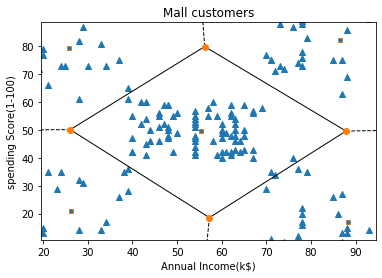

In [20]:
#Voronoi diagram
voronoi_plot_2d(vor)
plt.scatter(x[:,0],x[:,1],marker='^',cmap='gnuplot')
plt.scatter(cen[:,0],cen[:,1],marker='s',s=10)
plt.xlabel('Annual Income(k$)')
plt.ylabel('spending Score(1-100)')
plt.title('Mall customers')
plt.show()

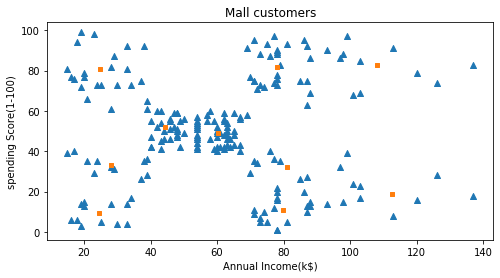

In [21]:
#considering 10 clusters
n=10
model_kmeans=KMeans(n_clusters=n)
model_kmeans.fit(x)
y=model_kmeans.predict(x)
cen=model_kmeans.cluster_centers_
plt.figure(figsize=(8,4))
plt.scatter(x[:,0],x[:,1],marker='^',cmap='gnuplot')
plt.scatter(cen[:,0],cen[:,1],marker='s',s=10)
plt.xlabel('Annual Income(k$)')
plt.ylabel('spending Score(1-100)')
plt.title('Mall customers')
plt.show()

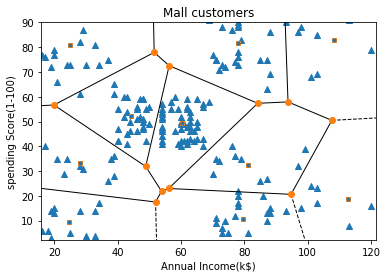

In [22]:
from scipy.spatial import Voronoi, voronoi_plot_2d
vor1=Voronoi(cen)
#Voronoi diagram
voronoi_plot_2d(vor1)
plt.scatter(x[:,0],x[:,1],marker='^',cmap='gnuplot')
plt.scatter(cen[:,0],cen[:,1],marker='s',s=10)
plt.xlabel('Annual Income(k$)')
plt.ylabel('spending Score(1-100)')
plt.title('Mall customers')
plt.show()

# Silhouette - for optimal number of clusters

In [23]:
from sklearn.metrics import silhouette_score

In [24]:
silhouette=[]
for i in range(2,201):   # it will calculate distance bw 2 clusters
    n=i
    model_kmeans=KMeans(n_clusters=n)
    model_kmeans.fit(x)
    y=model_kmeans.predict(x)
    silhouette.append(silhouette_score(x,y))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (196) found smaller than n_clusters (197). Possibly due to duplicate points in X.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (196) found smaller than n_clusters (198). Possibly due to duplicate points in X.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (196) found smaller than n_clusters (199). Possibly due to duplicate points in X.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (196) found smaller than n_clusters (200). Possibly due to duplicate points in X.
  """


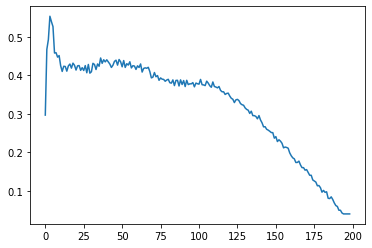

In [25]:
plt.plot(silhouette)

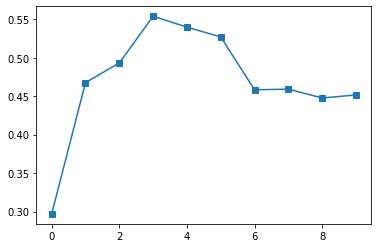

In [26]:
plt.plot(silhouette[:10],marker='s')

In [29]:
#x

# Hierarchy clustering

In [27]:
import scipy.cluster.hierarchy as sch

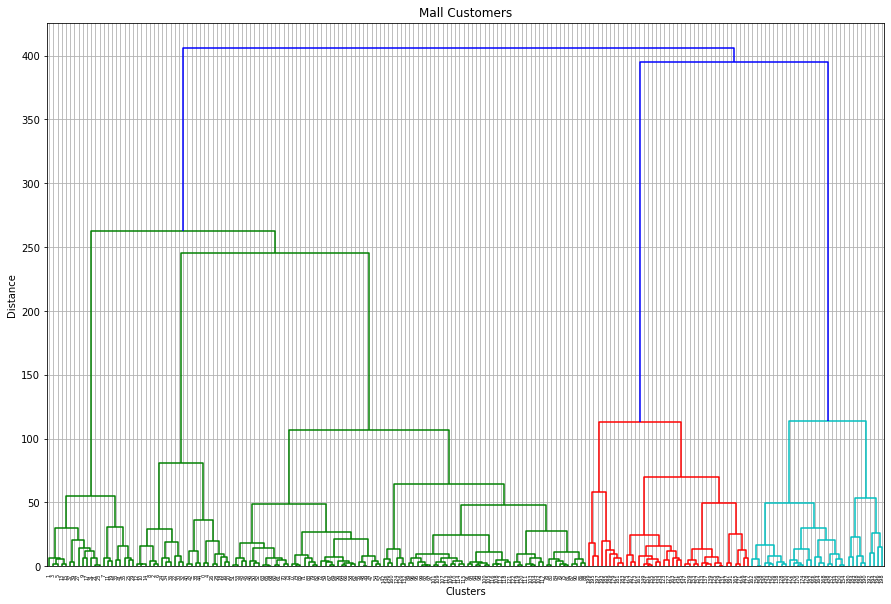

In [30]:
plt.figure(figsize=(15,10))
dendrogram= sch.dendrogram(sch.linkage(x,method='ward'))
plt.xlabel('Clusters')
plt.ylabel('Distance')
plt.title('Mall Customers')
plt.grid()
plt.show()

In [32]:
# we can consider the green line at 250. we can take the mean of the height,and draw the horizontal line-- its cutting four vertical lines.. so 4 clusters


In [33]:
n=4
from sklearn.cluster import AgglomerativeClustering

In [34]:
hc= AgglomerativeClustering(n_clusters=n)

In [35]:
y=hc.fit_predict(x)

In [36]:
import seaborn as sns

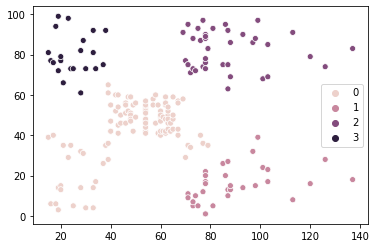

In [37]:
sns.scatterplot(x[:,0],x[:,1],hue=y)

In [38]:
silhouette_score(x,y)

0.4916598193892782